In [1]:
import math
import string
import itertools
import random
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import matplotx

In [2]:
plt.style.use(matplotx.styles.nord)

In [3]:
def shannon_entropy(data: str) -> float:
    entropy = 0.0
    if not data:
        return entropy 
        
    cnt = Counter(data)
    inv = 1 / len(data)
    for c in cnt:
        px = cnt[c] * inv
        entropy += px * math.log2(px)
        
    return -1 * entropy

In [4]:
def batched(iterable, n):
    iterator = iter(iterable)
    while batch := tuple(itertools.islice(iterator, n)):
        yield batch

In [5]:
def get_words():
    # basically removing noise and repeated words
    for word in open("/usr/share/dict/words").readlines():
        if "'" in word:
            continue

        word = word.strip()
        if len(word) < 4:
            continue

        yield word


words = list(get_words())

def gen_words(length=1024) -> str:
    curr = 0
    ws = []
    while curr < length:
        w = random.choice(words)
        curr += len(w)
        ws.append(w)

    return "".join(ws)[:length]


def gen_rand(length=1024) -> str:
    ws = ""
    for i in range(length):
        ch = random.choice(string.ascii_letters)
        ws += ch

    return ws

                             chunks   entropy
0  inconsiderableunidirectionalVero  3.590018
1  naDevanagarimacraméEliotNickelod  3.929229
2  eoneyebrowsTarbellrivalriesparri  3.519248
3  edEugeniamishmashcapitalizesglui  3.777518
4  estgyratingjockeyawaitoverrulese  3.878928
count    32.000000
mean      3.702977
std       0.162030
min       3.300608
25%       3.599342
50%       3.740169
75%       3.810127
max       3.965018
Name: entropy, dtype: float64


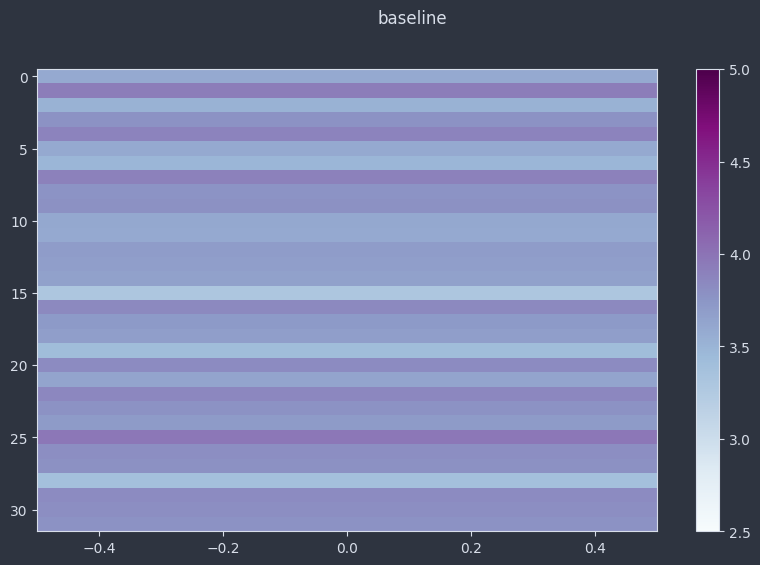

In [6]:
def baseline(size=1024, chunks=32):
    text = gen_words(size)
    df = pd.DataFrame()
    dim = len(text) // chunks
    df['chunks'] = ["".join(b) for b in batched(text, chunks)] 
    df['entropy'] = df['chunks'].apply(shannon_entropy)
    z = df['entropy'].array.reshape(dim, 1)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.imshow(z, vmin=2.5, vmax=5, aspect='auto', cmap='BuPu')
    fig.colorbar(im)
    fig.suptitle("baseline")
    print(df.head())
    print(df['entropy'].describe())

baseline(size=1024)

                              chunks   entropy
12  lingdullsreminiscencesensesfinge  3.266127
13  rsfreeloadedAzaniamenhadensunder  3.554229
14  studyanalyticaozeqNQEhqgwgGXyQpa  4.351410
15  PWTDMMPYFfQIxbWvdLBKFEBNVnXkzQnT  4.500000
16  zJEUiNMjVuxTshQCHinwxcnYBZBbGcTY  4.562500
17  RdtugaHLyudSpuZADocrestfallenwak  4.452820
18  ingconfinedcustomizespenuriousda  3.780639
19  intierrodentqueriedmonstrosities  3.266127
20  reschedulevelocitiesCurtretweeti  3.452820
21  nglavishMcCulloughdisplayinguntr  3.968139


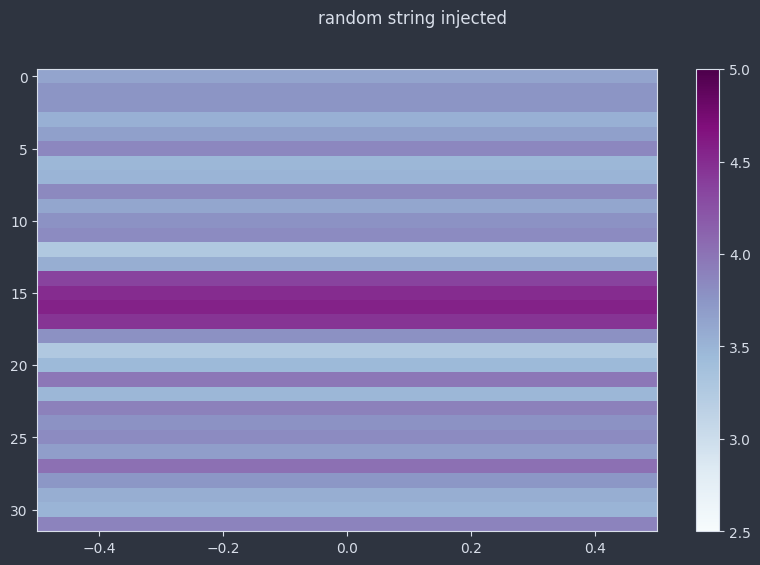

In [95]:
def rand():
    randlong = gen_words(462)
    randlong += gen_rand(100)
    randlong += gen_words(462)
        
    rblock = randlong[:1024]
    df = pd.DataFrame()
    df['chunks'] = ["".join(b) for b in batched(rblock, 32)]
    df['entropy'] = df['chunks'].apply(shannon_entropy)
    z = df['entropy'].array.reshape(len(df['entropy']), 1)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.imshow(z, vmin=2.5, vmax=5, aspect='auto', cmap='BuPu')
    fig.colorbar(im)
    fig.suptitle("random string injected")
    print(df[12:22])

rand()

                                 chunks   entropy
10   from pathlib import Path\n\n# Buil  3.952820
11     d paths inside the project like   3.718139
12    this: BASE_DIR / 'subdir'.\nBASE_  4.351410
13     DIR = Path(__file__).resolve().p  4.288910
14  arent.parent\n\n\n# Quick-start dev  4.030639
15     elopment settings - unsuitable f  3.765320
16    or production\n# See https://docs  4.015320
17     .djangoproject.com/en/dev/howto/  3.863609
18   deployment/checklist/\n\n# SECURIT  4.538910
19     Y WARNING: keep the secret key u  3.843139
20    sed in production secret!\nSECRET  4.140320
21     _KEY = "django-insecure-^!wab4@6  4.687500
22     tpqdr_)fv_u92ak$rku$imtx$p)8m&@v  4.288910
23   7d+j%r%m1!"\n\n# SECURITY WARNING:  4.625000
24      don't run with debug turned on   3.502620
25  in production!\nDEBUG = True\n\nALL  4.327820
26  OWED_HOSTS = []\n\n\n# Application   4.351410
27  definition\n\nINSTALLED_APPS = [\n   4.241729
28       "django.contrib.admin",\n    "  3.776211


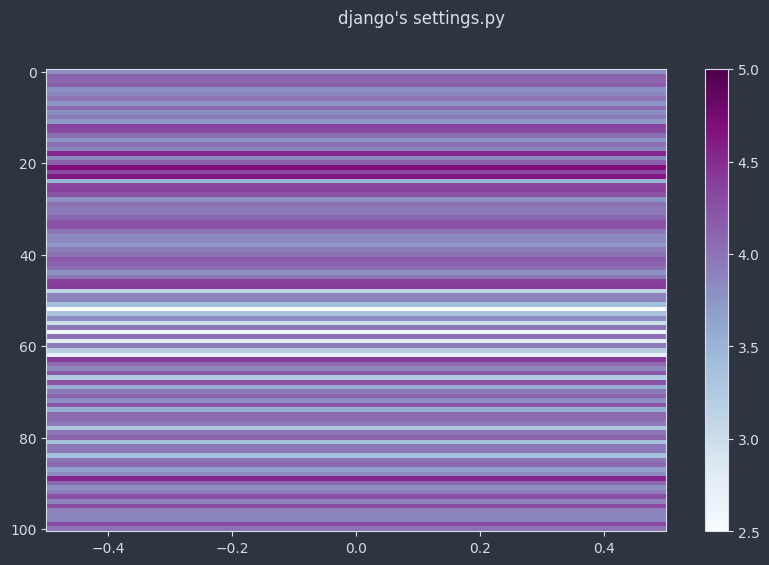

In [133]:
# dj
def dj():
    df = pd.DataFrame()
    data = "".join([line for line in open('sample-dj-settings.py').readlines()])
    df['chunks'] = ["".join(b) for b in batched(data, 32)]
    df['entropy'] = df['chunks'].apply(shannon_entropy)
    z = df['entropy'].array.reshape(len(df['entropy']), 1)
    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.imshow(z, vmin=2.5, vmax=5, aspect='auto', cmap='BuPu')
    fig.colorbar(im)
    fig.suptitle("django's settings.py")
    print(df[10:30])
    print(df[]

dj()